 Comparing aligned F0 tracks directly (MAE)...

MAE Distance Matrix (F0):

       MIC02   MIC03   MIC05   MIC06
MIC02      0.0     9.5     8.1     8.6
MIC03      9.5     0.0     8.1    11.7
MIC05      8.1     8.1     0.0     9.3
MIC06      8.6    11.7     9.3     0.0


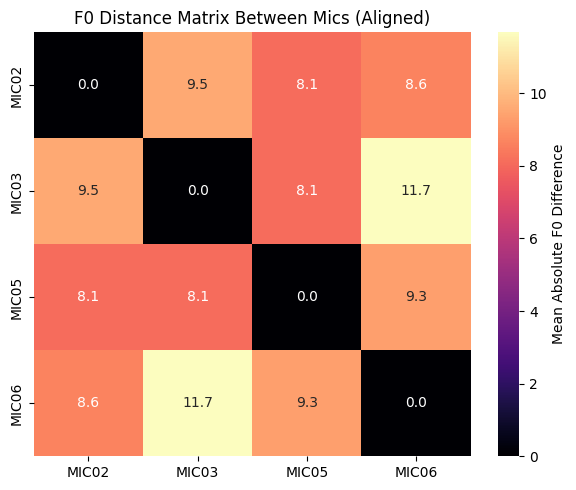

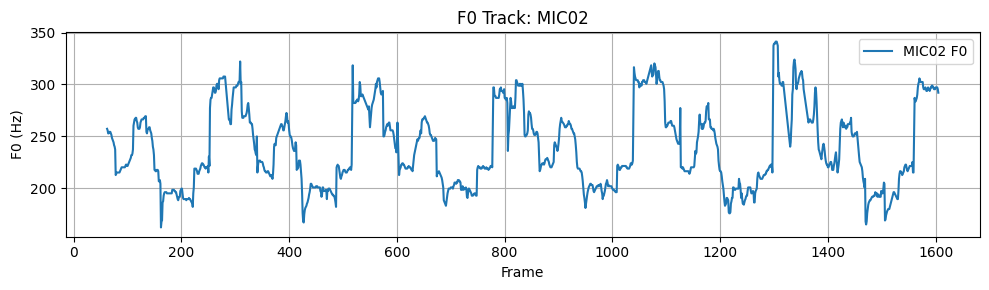

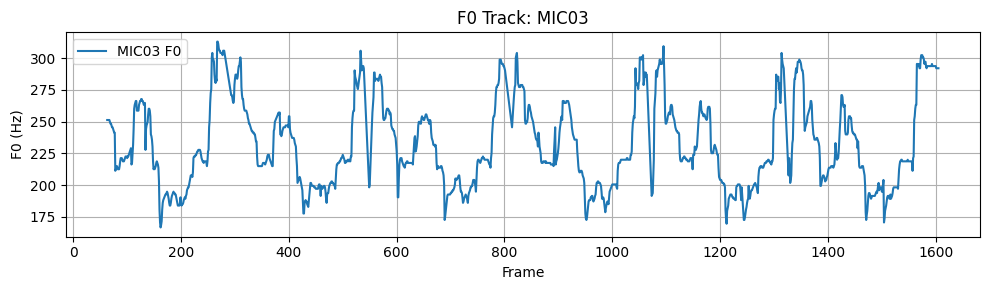

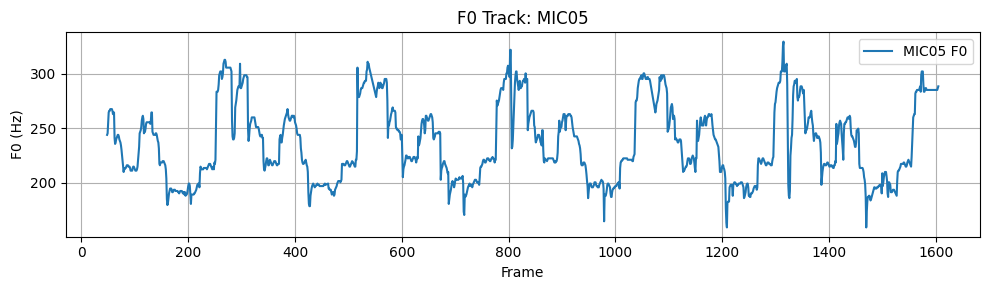

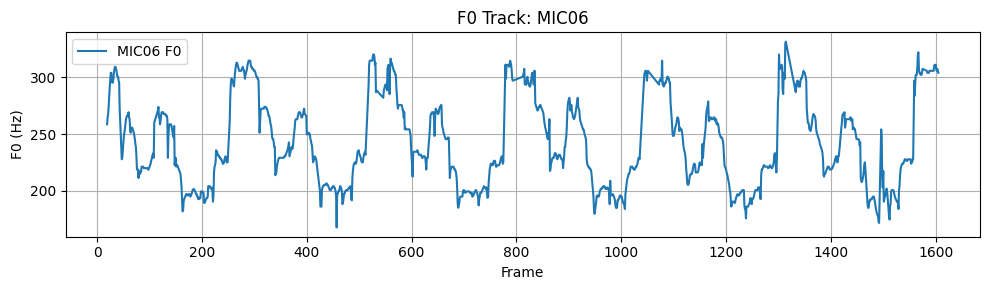

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

def compare_f0_directly(cache_dir="cache"):
    # Load F0 files
    f0_files = sorted([f for f in os.listdir(cache_dir) if f.endswith("_f0.npy")])
    mic_names = [f.split("_")[0] for f in f0_files]
    f0_data = {mic: np.load(os.path.join(cache_dir, f"{mic}_f0.npy")) for mic in mic_names}

    n = len(mic_names)
    distance_matrix = np.zeros((n, n))

    print(" Comparing aligned F0 tracks directly (MAE)...")
    for i, j in itertools.combinations(range(n), 2):
        f0_i = f0_data[mic_names[i]]
        f0_j = f0_data[mic_names[j]]

        # Optional: compare only voiced parts
        mask = (f0_i > 0) & (f0_j > 0)
        if np.sum(mask) == 0:
            dist = np.nan
        else:
            dist = np.mean(np.abs(f0_i[mask] - f0_j[mask]))

        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist

    # Print matrix
    print("\nMAE Distance Matrix (F0):\n")
    print("      " + "  ".join(f"{name:>6}" for name in mic_names))
    for i, name in enumerate(mic_names):
        row = "  ".join(f"{distance_matrix[i, j]:6.1f}" for j in range(n))
        print(f"{name:<6}  {row}")

    # Plot heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        distance_matrix,
        xticklabels=mic_names,
        yticklabels=mic_names,
        cmap="magma",
        annot=True,
        fmt=".1f",
        cbar_kws={'label': 'Mean Absolute F0 Difference'}
    )
    plt.title("F0 Distance Matrix Between Mics (Aligned)")
    plt.tight_layout()
    plt.show()

    # Plot each F0 track in its own figure
    for mic in mic_names:
        f0 = f0_data[mic]
        voiced_mask = f0 > 0

        plt.figure(figsize=(10, 3))
        plt.plot(np.arange(len(f0))[voiced_mask], f0[voiced_mask], label=f"{mic} F0")
        plt.title(f"F0 Track: {mic}")
        plt.xlabel("Frame")
        plt.ylabel("F0 (Hz)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return distance_matrix, mic_names

# Run the comparison
distance_matrix, mic_names = compare_f0_directly()
